In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
df = pd.read_csv("Stock Price Data.csv", index_col= 0, parse_dates = True)

In [7]:
len(df)

2265

In [8]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,37.068000,37.131000,36.948751,36.998249,36.998249,4892780.4
2010-04-01,37.187250,37.394250,37.092751,37.234500,37.234500,7115420.4
2010-05-01,37.151249,37.275000,36.780001,37.162500,37.162500,7148180.4
2010-06-01,37.218750,37.275000,37.045501,37.133251,37.133251,4610180.4
2010-07-01,37.166999,37.263749,36.946500,37.059000,37.059000,4356020.4
2010-08-01,37.065750,37.128750,36.883500,37.083750,37.083750,4959380.4
2010-11-01,37.185000,37.207499,36.777750,36.971250,36.971250,5759300.4
2010-12-01,36.249001,36.260250,35.758500,35.765250,35.765250,18947900.4
2010-01-13,35.763000,35.877750,35.468250,35.812500,35.812500,18584660.4


In [9]:
df.index

DatetimeIndex(['2009-12-31', '2010-04-01', '2010-05-01', '2010-06-01',
               '2010-07-01', '2010-08-01', '2010-11-01', '2010-12-01',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2265.000000,2265.000000,2265.000000,2265.000000,2265.000000,2.265000e+03
mean,76.733988,77.405088,76.018738,76.740164,76.740164,6.282354e+06
std,29.481122,29.753815,29.145116,29.455220,29.455220,4.761190e+06
min,34.370250,34.462500,33.967500,34.368000,34.368000,9.762504e+05
25%,52.797751,53.164499,52.246498,52.773001,52.773001,3.480140e+06
50%,71.799001,72.456000,70.980001,71.781000,71.781000,4.931120e+06
75%,91.122002,91.932003,90.636001,91.238999,91.238999,7.561460e+06
max,164.499000,165.471002,163.518004,164.786993,164.786993,5.810654e+07


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2265 entries, 2009-12-31 to 2018-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2265 non-null   float64
 1   High       2265 non-null   float64
 2   Low        2265 non-null   float64
 3   Close      2265 non-null   float64
 4   Adj Close  2265 non-null   float64
 5   Volume     2265 non-null   float64
dtypes: float64(6)
memory usage: 123.9 KB


In [12]:
df.nunique()

Open         2078
High         2048
Low          2059
Close        2094
Adj Close    2094
Volume       2241
dtype: int64

## Checking for Missing Data

In [13]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

No missing data in the dataset

## Data Visualisation

Text(0.5,0,'Year')

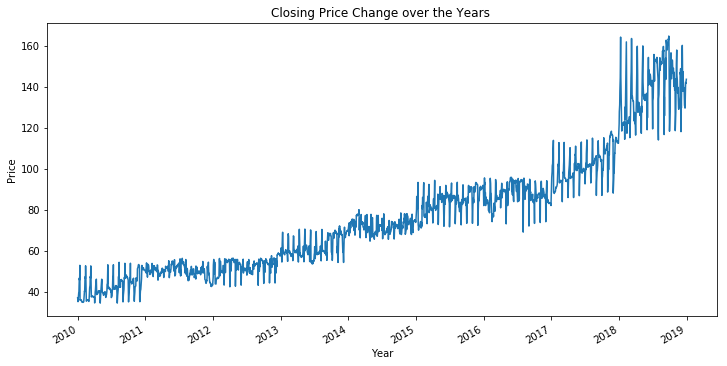

In [14]:
plt.figure(figsize = (12,6))
df["Close"].plot()
plt.title("Closing Price Change over the Years ")
plt.ylabel("Price")
plt.xlabel("Year")

Text(0.5,0,'Year')

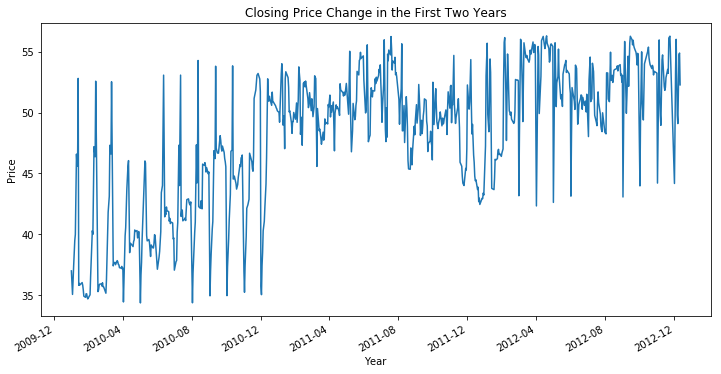

In [15]:
plt.figure(figsize = (12,6))
df.iloc[:365*2]["Close"].plot()
plt.title("Closing Price Change in the First Two Years")
plt.ylabel("Price")
plt.xlabel("Year")

Text(0.5,0,'Year')

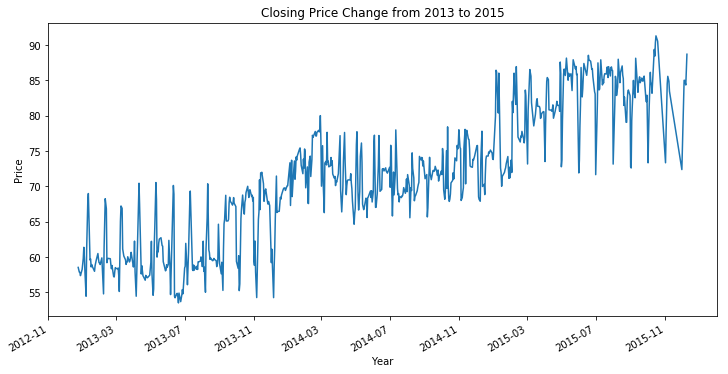

In [16]:
plt.figure(figsize = (12,6))
df.iloc[750:365*4]["Close"].plot()
plt.title("Closing Price Change from 2013 to 2015")
plt.ylabel("Price")
plt.xlabel("Year")

Text(0.5,0,'Year')

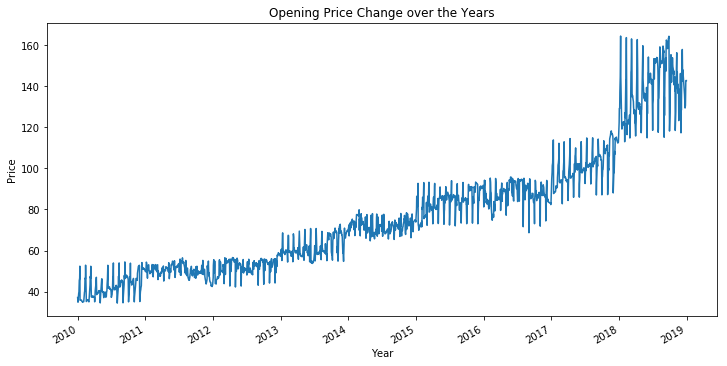

In [17]:
plt.figure(figsize = (12,6))
df["Open"].plot()
plt.title("Opening Price Change over the Years")
plt.ylabel("Price")
plt.xlabel("Year")

The opening price follows the same pattern as the closing price.

Text(0.5,0,'Year')

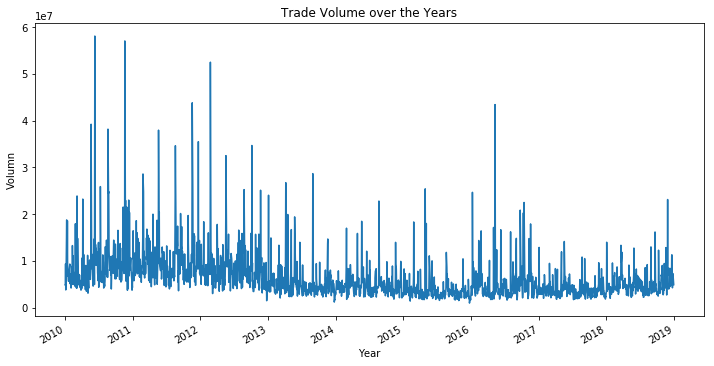

In [18]:
plt.figure(figsize = (12,6))
df["Volume"].plot()
plt.title("Trade Volume over the Years")
plt.ylabel("Volumn")
plt.xlabel("Year")

Text(0.5,1,'Correlation Coefficient')

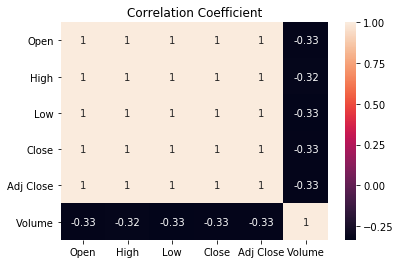

In [19]:
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation Coefficient")

## Time Series Analysis

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [21]:
df2 = df.copy()
df2 = df2.reset_index()
df2 = df.asfreq("B").ffill()

In [22]:
decomp = seasonal_decompose(df2["Close"], model="mul")

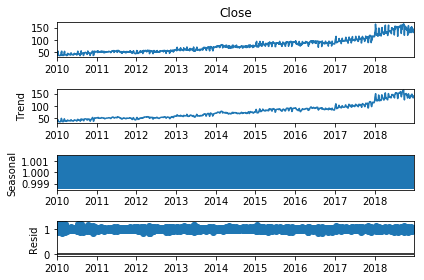

In [23]:
decomp.plot();

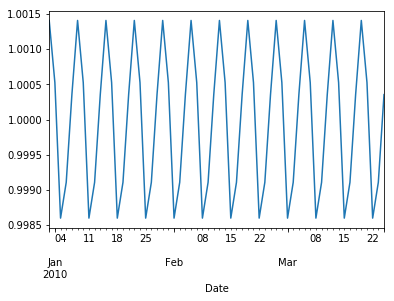

In [24]:
decomp.seasonal[:60].plot()

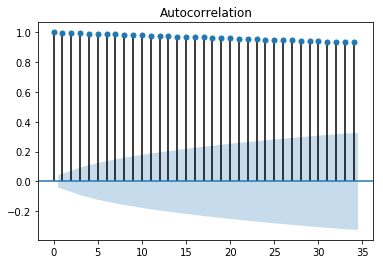

In [25]:
plot_acf(df["Close"]);

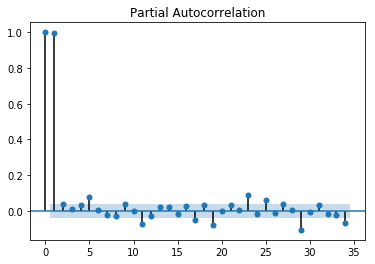

In [26]:
plot_pacf(df["Close"]);

There is a highly persistent autocorrelation more than 10 lags in the ACF plot and a significant spikes reaching 1 at lag 1 in PACF plot. This suggests an AR signature with strong first lag autocorrelation, ie a random walk process.

## Forecasting with Holt-Winters Method

In [27]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tools.eval_measures import mse, rmse

In [28]:
limit = int(len(df)*0.8)
train = df.iloc[:limit]
test = df.iloc[limit:]

### Simple Exponential Smoothing

In [29]:
holt_model1 = SimpleExpSmoothing(train["Close"])

/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


In [30]:
fitted_holt_model1 = holt_model1.fit(smoothing_level = 0.1)

In [31]:
holt_pred1 = fitted_holt_model1.forecast(len(test))

/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [32]:
holt_model1_result = test.copy()
holt_model1_result["Predictions"] = np.array(holt_pred1)

Text(0.5,0,'Year')

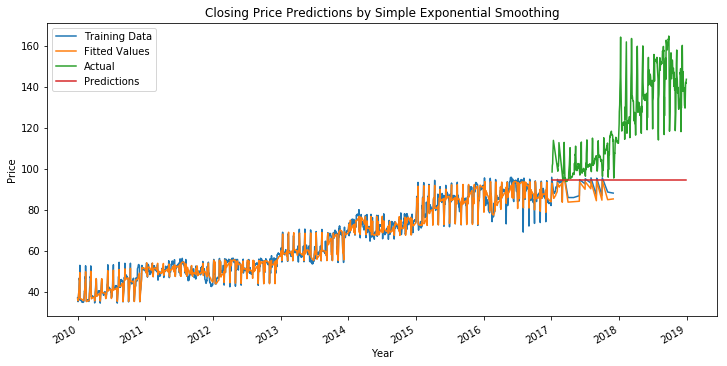

In [33]:
plt.figure(figsize=(12,6))
train["Close"].plot(legend=True)
fitted_holt_model1.fittedvalues.plot(legend=True)
test["Close"].plot(legend=True)
holt_model1_result["Predictions"].plot(legend=True)
plt.legend(["Training Data", "Fitted Values", "Actual","Predictions" ])
plt.title("Closing Price Predictions by Simple Exponential Smoothing")
plt.ylabel("Price")
plt.xlabel("Year")

### Holt-Winters Method

In [34]:
holt_model2 = ExponentialSmoothing(train["Close"], trend="mul", seasonal = "mul", seasonal_periods = 30)

fitted_holt_model2 = holt_model2.fit(smoothing_level = 0.1)

holt_pred2 = fitted_holt_model2.forecast(len(test))

holt_model2_result = test.copy()
holt_model2_result["Predictions"] = np.array(holt_pred2)

/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


Text(0.5,0,'Year')

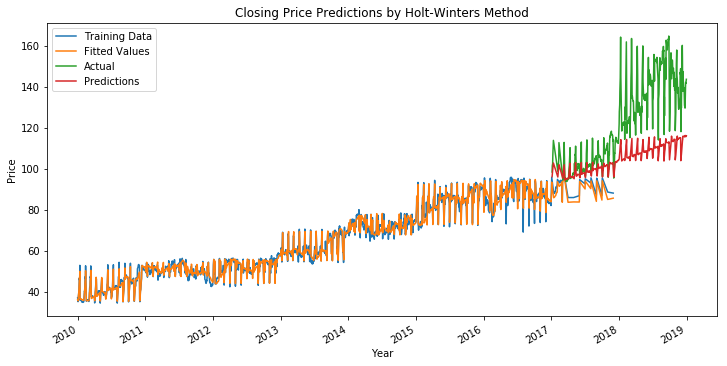

In [35]:
plt.figure(figsize=(12,6))
train["Close"].plot(legend=True)
fitted_holt_model2.fittedvalues.plot(legend=True)
test["Close"].plot(legend=True)
holt_model2_result["Predictions"].plot(legend=True)
plt.legend(["Training Data", "Fitted Values", "Actual","Predictions" ])
plt.title("Closing Price Predictions by Holt-Winters Method")
plt.ylabel("Price")
plt.xlabel("Year")

In [36]:
print("Evaluation of Holt-Winters Method")
print("MSE:", mse(test["Close"], holt_model2_result["Predictions"]))

print("RMSE:", rmse(test["Close"], holt_model2_result["Predictions"]))

print("Adj RMSE:", rmse(test["Close"], holt_model2_result["Predictions"])/ np.mean(test['Close']))

Evaluation of Holt-Winters Method
MSE: 563.346796756108
RMSE: 23.7349277807224
Adj RMSE: 0.19198834434283504


On average, the predictions deviates by around 20% from the actual prices.

### Submission with Holt-Winters Model

In [37]:
# Predicting Future Close Price

holt_model = ExponentialSmoothing(df["Close"], trend="mul", seasonal = "mul", seasonal_periods =30)

fitted_holt_model = holt_model.fit(smoothing_level=0.1)

holt_pred = fitted_holt_model.predict(start= len(df), end = len(df)+355-1)

/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


Text(0.5,0,'Year')

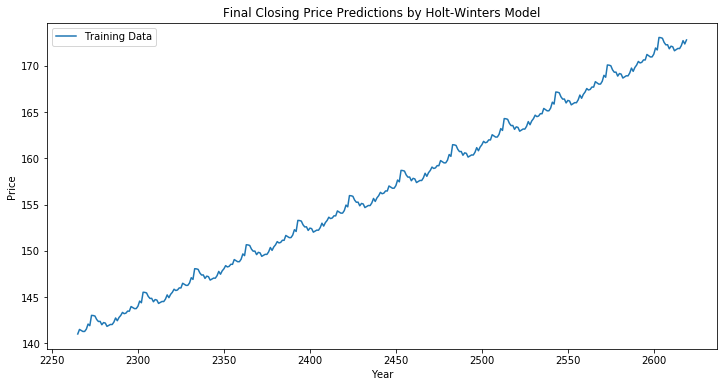

In [38]:
plt.figure(figsize=(12,6))
holt_pred.plot()
plt.legend(["Training Data", "Fitted Values", "Actual","Predictions" ])
plt.title("Final Closing Price Predictions by Holt-Winters Model")
plt.ylabel("Price")
plt.xlabel("Day")

Text(0.5,0,'Year')

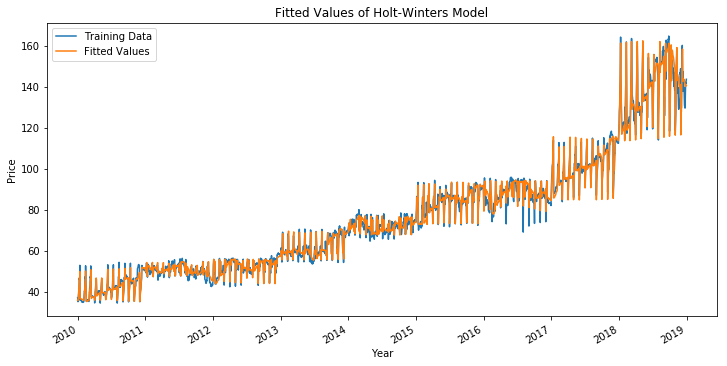

In [39]:
plt.figure(figsize=(12,6))
df["Close"].plot(legend=True)
fitted_holt_model.fittedvalues.plot(legend=True)
plt.legend(["Training Data", "Fitted Values", "Actual","Predictions" ])
plt.title("Fitted Values of Holt-Winters Model")
plt.ylabel("Price")
plt.xlabel("Year")

In [40]:
# Exporting Predictiong to CSV file for submission
subm_df = pd.read_csv('Sample Submission.csv')
subm_df['Close'] = np.array(holt_pred)
subm_df.to_csv('Subm_holt.csv', index=False)

## Forecasting with ARIMA Model
Before we build the ARIMA model for forecasting, we would have to check if the time series data is stationary. Non-stationary data will lead to unreliable and poor forecasting.

The Time Series Data is stationary if:
- Mean does not not change with time
- Variance does not change with time
- Autocovariance does not change with time, but only varies with k (the order of lag)

We can check the stationarity of the data using:
1. Augmented Dickey-Fuller (ADF) Test: This tests for the stationarity of the time series data around a __stochastic trend__. The null hypothesis is that the time series is non-stationary
2. Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test : This tests for the stationarity of the time series data around a __deterministic trend__. The null hypothesis is that the time series is stationary.

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, grangercausalitytests, kpss

In [42]:
def run_adf(df):
    adf_result = adfuller(df)
    print("Results of Dickey-Fuller Test")
    print(f"Test Statistic : {adf_result[0]}")
    print(f"p_value : {adf_result[1]}")
    print(f"Lags : {adf_result[2]}")
    print(f"Number of Observations Used: {adf_result[3]}")
    for key, val in adf_result[4].items():
        print(f"Critical Value {key} : {val}")

In [43]:
run_adf(df["Close"])

Results of Dickey-Fuller Test
Test Statistic : 0.27903588129633883
p_value : 0.9763619547679433
Lags : 24
Number of Observations Used: 2240
Critical Value 1% : -3.433272682848605
Critical Value 5% : -2.86283115989218
Critical Value 10% : -2.567457345543686


Since test statistic is much larger than the critical values, there is insufficient evidence to reject the null hypothesis. Thus, the time series has a unit root and is **non-stationary**. 

In [44]:
def run_kpss(df):
    kpss_result = kpss(df)
    print("Results of KPSS test")
    print(f"Test Statistics : {kpss_result[0]}")
    print(f"P_value : {kpss_result[1]}")
    print(f"Lags : {kpss_result[2]}")
    for key, val in kpss_result[3].items():
        print(f"Critical Value {key} : {val}")

In [45]:
run_kpss(df["Close"])

Results of KPSS test
Test Statistics : 7.123522685348482
P_value : 0.01
Lags : 27
Critical Value 10% : 0.347
Critical Value 5% : 0.463
Critical Value 2.5% : 0.574
Critical Value 1% : 0.739


/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Since test statistic is much larger than the critical values, there is sufficient evidence to reject the null hypothesis. Thus, the data is **non-stationary**. 

### Stationarising the Data

In [46]:
# Taking first difference
df["Close_lag1"] = df["Close"].shift(1)
df["Close_diff1"] = df["Close"] - df["Close_lag1"]

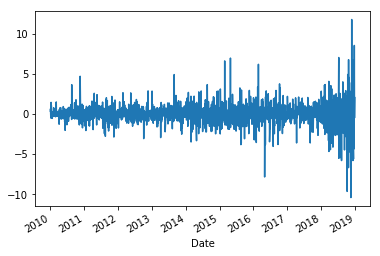

In [47]:
df["Close_diff1"].plot()

In [48]:
run_adf(df["Close_diff1"].dropna())

Results of Dickey-Fuller Test
Test Statistic : -9.068491109298344
p_value : 4.366596702701172e-15
Lags : 27
Number of Observations Used: 2236
Critical Value 1% : -3.43327791728229
Critical Value 5% : -2.8628334711844436
Critical Value 10% : -2.56745857614543


Since test statistic is much smaller than the critical values, there is sufficient evidence to reject the null hypothesis. Thus, the data is **stationary**. 

In [49]:
run_kpss(df["Close_diff1"].dropna())

Results of KPSS test
Test Statistics : 0.14408240915643172
P_value : 0.1
Lags : 27
Critical Value 10% : 0.347
Critical Value 5% : 0.463
Critical Value 2.5% : 0.574
Critical Value 1% : 0.739


/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Since test statistic is smaller than the critical values, there is insufficient evidence to reject the null hypothesis. Thus, the data is **stationary**. 

Taking the first different seems to make the data more stationary. However, standard deviation seems to change towards the end of the data. We could try to use log of close price to stationarise the data.

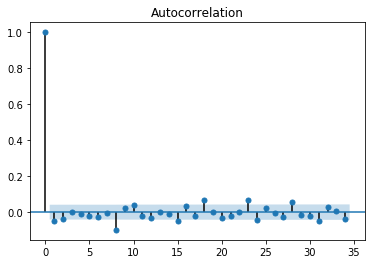

In [50]:
plot_acf(df["Close_diff1"].dropna());

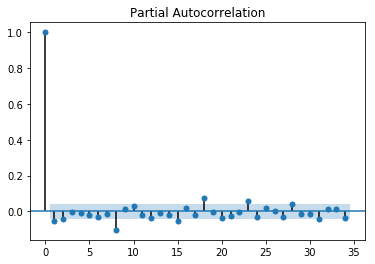

In [51]:
plot_pacf(df["Close_diff1"].dropna());

In [52]:
# Using log to stationarise
df["Close_log"] = np.log(df["Close"])

In [53]:
run_adf(df["Close_log"].dropna())

Results of Dickey-Fuller Test
Test Statistic : -0.7686800473836273
p_value : 0.8281494233115738
Lags : 3
Number of Observations Used: 2261
Critical Value 1% : -3.4332455062745577
Critical Value 5% : -2.862819159865148
Critical Value 10% : -2.567450956377989


Since test statistic is much larger than the critical values, there is insufficient evidence to reject the null hypothesis. Thus, the data is **non-stationary**. 

In [54]:
run_kpss(df["Close_log"].dropna())

Results of KPSS test
Test Statistics : 7.698566118671108
P_value : 0.01
Lags : 27
Critical Value 10% : 0.347
Critical Value 5% : 0.463
Critical Value 2.5% : 0.574
Critical Value 1% : 0.739


/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Since test statistic is much larger than the critical values, there is sufficient evidence to reject the null hypothesis. Thus, the data is **non-stationary**. 

In [55]:
df["Close_log_lag1"] = df["Close_log"].shift(1)
df["Close_log_diff1"] = df["Close_log"] - df["Close_log_lag1"]

In [56]:
run_adf(df["Close_log_diff1"].dropna())

Results of Dickey-Fuller Test
Test Statistic : -29.2338523627134
p_value : 0.0
Lags : 2
Number of Observations Used: 2261
Critical Value 1% : -3.4332455062745577
Critical Value 5% : -2.862819159865148
Critical Value 10% : -2.567450956377989


In [57]:
run_kpss(df["Close_log_diff1"].dropna())

Results of KPSS test
Test Statistics : 0.026505164310395048
P_value : 0.1
Lags : 27
Critical Value 10% : 0.347
Critical Value 5% : 0.463
Critical Value 2.5% : 0.574
Critical Value 1% : 0.739


/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


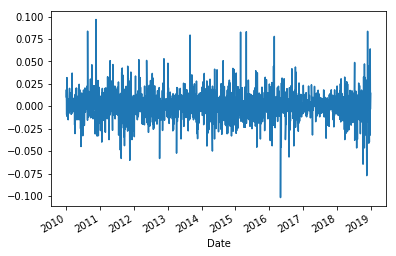

In [58]:
df["Close_log_diff1"].plot()

Taking log and then the first different seems to do better at stationarising the data.

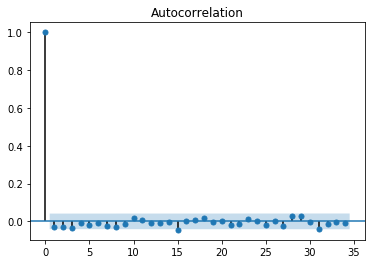

In [59]:
plot_acf(df["Close_log_diff1"].dropna());

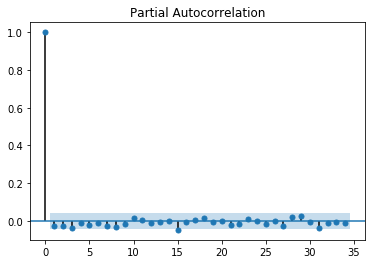

In [60]:
plot_pacf(df["Close_log_diff1"].dropna());

## Building the ARIMA Model

In [61]:
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [62]:
from pmdarima import auto_arima

/Users/Daniel/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [63]:
limit = int(len(df)*0.8)
train = df.iloc[:limit]
test = df.iloc[limit:]

In [64]:
model2 = auto_arima(df["Close_log"], start_p = 0, start_q = 0, max_p=8, max_q = 15, seasonal = False, trace= True)

Fit ARIMA: order=(0, 1, 0); AIC=-12674.442, BIC=-12662.993, Fit time=0.012 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-12674.403, BIC=-12657.229, Fit time=0.036 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-12674.527, BIC=-12657.353, Fit time=0.054 seconds
Fit ARIMA: order=(1, 1, 1); AIC=-12684.454, BIC=-12661.554, Fit time=0.926 seconds
Fit ARIMA: order=(1, 1, 2); AIC=-12682.914, BIC=-12654.290, Fit time=1.499 seconds


/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


Fit ARIMA: order=(2, 1, 2); AIC=-12686.439, BIC=-12652.090, Fit time=4.761 seconds
Fit ARIMA: order=(3, 1, 2); AIC=-12679.348, BIC=-12639.274, Fit time=2.311 seconds
Fit ARIMA: order=(2, 1, 1); AIC=-12682.898, BIC=-12654.274, Fit time=2.002 seconds


/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Fit ARIMA: order=(2, 1, 3); AIC=-12680.015, BIC=-12639.941, Fit time=3.516 seconds


/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


Fit ARIMA: order=(3, 1, 3); AIC=-12685.925, BIC=-12640.126, Fit time=18.874 seconds
Total fit time: 34.004 seconds


In [65]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 2264
Model:                 ARIMA(2, 1, 2)   Log Likelihood                6349.220
Method:                       css-mle   S.D. of innovations              0.015
Date:                Thu, 08 Oct 2020   AIC                         -12686.439
Time:                        00:00:49   BIC                         -12652.090
Sample:                             1   HQIC                        -12673.906
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006   3.61e-05     15.479      0.000       0.000       0.001
ar.L1.D.y      1.7937      0.018     99.984      0.000       1.759       1.829
ar.L2.D.y     -0.7958      0.018    -44.633      0.000      -0.831      -0.761
ma.L1.D.y     -1.8377      0.012   -155.768      0.000      -1.861      -1.815
ma.L2.D.y      0.8378      0.012     71.124      0.000       0.815       0.861
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0108           +0.0000j            1.0108            0.0000
AR.2            1.2432           +0.0000j            1.2432            0.0000
MA.1            1.0006           +0.0000j            1.0006            0.0000
MA.2            1.1929           +0.0000j            1.1929            0.0000
-----------------------------------------------------------------------------
"""

In [66]:
# ARIMA (2,1,2) of Close__log
model2= ARIMA(train["Close_log"], order = (2,1,2))

/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. fore

In [67]:
result2 = model2.fit()

In [68]:
test2 = result2.predict(start= len(train), end = len(train)+ len(test)-1, typ="levels")
test2_ori = np.exp(test2)

result2_tbl = pd.concat([test[["Close",'Close_log']].reset_index(), pd.DataFrame(test2_ori).reset_index()[0], pd.DataFrame(test2).reset_index()[0]], axis = 1)

result2_tbl.columns =['Date', 'Close', 'Close_log', "Prediction", "Prediciton_log"]

result2_tbl.set_index("Date", inplace=True)

result2_tbl

/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


,Close,Close_log,Prediction,Prediciton_log
Date,,,,
2017-03-15,95.532003,4.559461,95.677083,4.560979
2017-03-16,95.567997,4.559838,95.773632,4.561987
2017-03-17,95.126999,4.555213,95.888016,4.563181
2017-03-20,95.010001,4.553982,95.983956,4.564181
2017-03-21,93.795003,4.541112,96.094956,4.565337
...,...,...,...,...
2018-12-24,129.597002,4.864430,123.528603,4.816473
2018-12-26,138.155997,4.928383,123.590670,4.816975
2018-12-27,142.079997,4.956390,123.652768,4.817477


Text(0.5,0,'Year')

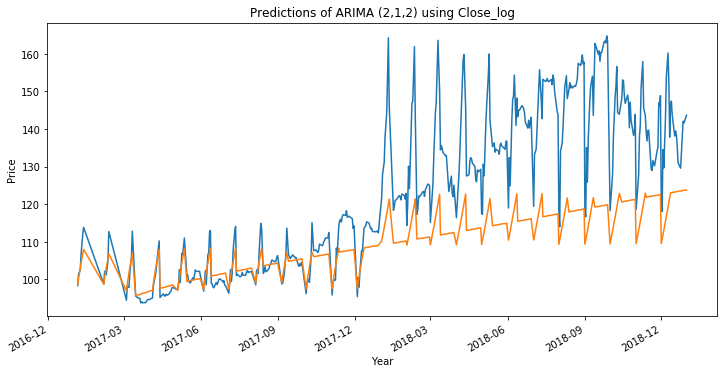

In [69]:
plt.figure(figsize=(12,6))
result2_tbl["Close"].plot()
result2_tbl["Prediction"].plot()
plt.title("Predictions of ARIMA (2,1,2) using Close_log")
plt.ylabel("Price")
plt.xlabel("Year")

In [70]:
# ARIMA (2,1,2) of Close__log
print("MSE:", mse(result2_tbl['Close'], result2_tbl['Prediction']))

print("RMSE:", rmse(result2_tbl['Close'], result2_tbl['Prediction']))

print("Adj RMSE:", rmse(result2_tbl['Close'], result2_tbl['Prediction'])/ np.mean(result2_tbl['Close']))

MSE: 358.7641975562898
RMSE: 18.94107171086921
Adj RMSE: 0.15321154677379048


In [71]:
limit = int(len(df)*0.8)
train = df.iloc[:limit]
test = df.iloc[limit:]

In [72]:
len(train) ,len(test)

(1812, 453)

In [73]:
# ARIMA (1,1,1) of Close__log
model3 = ARIMA(train["Close_log"], order = (1,1,1))

/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. fore

In [74]:
result3 = model3.fit()

In [75]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Close_log   No. Observations:                 1811
Model:                 ARIMA(1, 1, 1)   Log Likelihood                5075.812
Method:                       css-mle   S.D. of innovations              0.015
Date:                Thu, 08 Oct 2020   AIC                         -10143.624
Time:                        00:00:54   BIC                         -10121.617
Sample:                             1   HQIC                        -10135.503
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0005      3e-05     16.729      0.000       0.000       0.001
ar.L1.D.Close_log     0.9797      0.005    200.902      0.000       0.970       0.989
ma.L1.D.Close_log    -1.0000      0.002   -618.355      0.000      -1.003      -0.997
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0207           +0.0000j            1.0207            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [76]:
test3 = result3.predict(start= len(train), end = len(train)+ len(test)-1, typ="levels")
test3_ori = np.exp(test3)
result3_tbl = pd.concat([test[["Close",'Close_log']].reset_index(), pd.DataFrame(test3_ori).reset_index()[0], pd.DataFrame(test3).reset_index()[0]], axis = 1)
result3_tbl.columns =['Date', 'Close', 'Close_log', "Prediction", "Prediciton_log"]
result3_tbl.set_index("Date", inplace=True)
result3_tbl

/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


,Close,Close_log,Prediction,Prediciton_log
Date,,,,
2017-03-15,95.532003,4.559461,95.667647,4.560880
2017-03-16,95.567997,4.559838,95.775183,4.562004
2017-03-17,95.126999,4.555213,95.881630,4.563114
2017-03-20,95.010001,4.553982,95.987010,4.564213
2017-03-21,93.795003,4.541112,96.091343,4.565299
...,...,...,...,...
2018-12-24,129.597002,4.864430,123.528316,4.816470
2018-12-26,138.155997,4.928383,123.590378,4.816973
2018-12-27,142.079997,4.956390,123.652470,4.817475


Text(0.5,0,'Year')

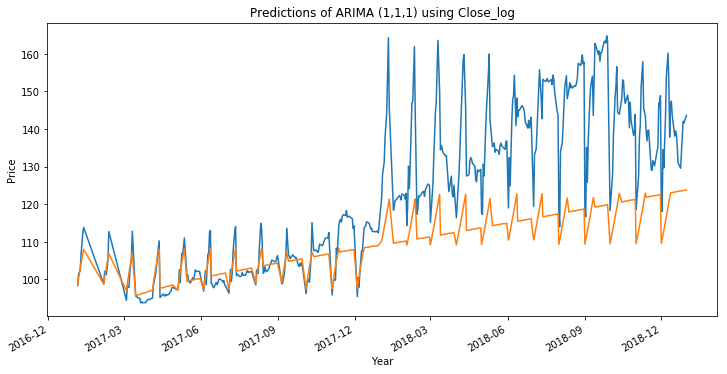

In [77]:
plt.figure(figsize=(12,6))
result3_tbl["Close"].plot()
result3_tbl["Prediction"].plot()
plt.title("Predictions of ARIMA (1,1,1) using Close_log")
plt.ylabel("Price")
plt.xlabel("Year")

### Evaluating the model

In [78]:
# ARIMA (2,1,2) of Close__log
print("MSE:", mse(result2_tbl['Close'], result2_tbl['Prediction']))

print("RMSE:", rmse(result2_tbl['Close'], result2_tbl['Prediction']))

print("Adj RMSE:", rmse(result2_tbl['Close'], result2_tbl['Prediction'])/ np.mean(result2_tbl['Close']))

MSE: 358.7641975562898
RMSE: 18.94107171086921
Adj RMSE: 0.15321154677379048


In [79]:
# ARIMA (1,1,1) of Close__log
print("MSE:", mse(result3_tbl['Close'], result3_tbl['Prediction']))
print("RMSE:",rmse(result3_tbl['Close'], result3_tbl['Prediction']))
print("Adj RMSE:", rmse(result3_tbl['Close'], result3_tbl['Prediction'])/ np.mean(result3_tbl['Close']))

MSE: 358.74020421399075
RMSE: 18.94043833215036
Adj RMSE: 0.1532064234663721


### Submission with ARIMA

In [80]:
arima_model = ARIMA(df["Close_log"], order = (1,1,1))

fitted_arima = arima_model.fit()

fitted_arima.summary()

/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. fore

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Close_log   No. Observations:                 2264
Model:                 ARIMA(1, 1, 1)   Log Likelihood                6346.227
Method:                       css-mle   S.D. of innovations              0.015
Date:                Thu, 08 Oct 2020   AIC                         -12684.454
Time:                        00:00:56   BIC                         -12661.554
Sample:                             1   HQIC                        -12676.098
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0006      0.000      4.303      0.000       0.000       0.001
ar.L1.D.Close_log     0.9589      0.023     41.251      0.000       0.913       1.004
ma.L1.D.Close_log    -0.9813      0.017    -59.418      0.000      -1.014      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0429           +0.0000j            1.0429            0.0000
MA.1            1.0191           +0.0000j            1.0191            0.0000
-----------------------------------------------------------------------------
"""

In [81]:
arima_pred = fitted_arima.predict(start= len(df), end = len(df)+ 355-1, typ="levels")

arima_pred_ori = np.exp(arima_pred)

/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [82]:
# Exporting final predictions from ARIMA (1,1,1) to CSV for submission
subm_df = pd.read_csv('Sample Submission.csv')
subm_df['Close'] = np.array(arima_pred_ori)
subm_df.to_csv('Subm_arima.csv', index=False)

In [125]:
arima_model2 = ARIMA(df["Close_log"], order = (2,1,2))

fitted_arima2 = arima_model2.fit()

fitted_arima2.summary()

/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. fore

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Close_log   No. Observations:                 2264
Model:                 ARIMA(2, 1, 2)   Log Likelihood                6349.220
Method:                       css-mle   S.D. of innovations              0.015
Date:                Thu, 08 Oct 2020   AIC                         -12686.439
Time:                        00:08:12   BIC                         -12652.090
Sample:                             1   HQIC                        -12673.906
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0006   3.61e-05     15.479      0.000       0.000       0.001
ar.L1.D.Close_log     1.7937      0.018     99.984      0.000       1.759       1.829
ar.L2.D.Close_log    -0.7958      0.018    -44.633      0.000      -0.831      -0.761
ma.L1.D.Close_log    -1.8377      0.012   -155.768      0.000      -1.861      -1.815
ma.L2.D.Close_log     0.8378      0.012     71.124      0.000       0.815       0.861
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0108           +0.0000j            1.0108            0.0000
AR.2            1.2432           +0.0000j            1.2432            0.0000
MA.1            1.0006           +0.0000j            1.0006            0.0000
MA.2            1.1929           +0.0000j            1.1929            0.0000
-----------------------------------------------------------------------------
"""

In [126]:
arima_pred2 = fitted_arima2.predict(start= len(df), end = len(df)+ 355-1, typ="levels")

arima_pred_ori2 = np.exp(arima_pred2)

/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/Daniel/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [127]:
# Exporting final predictions from ARIMA model (2,1,2) to CSV for submission
subm_df = pd.read_csv('Sample Submission.csv')
subm_df['Close'] = np.array(arima_pred_ori)
subm_df.to_csv('Subm_arima2.csv', index=False)

## Forecasting with LSTM

In [83]:
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation,concatenate
from keras import optimizers
from keras.preprocessing.sequence import TimeseriesGenerator

In [84]:
from keras.models import Sequential

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
limit = int(len(df)*0.8)
train = df.iloc[:limit][["Close"]]
test = df.iloc[limit:][["Close"]]

In [87]:
len(train), len(test)

(1812, 453)

In [88]:
scaler = MinMaxScaler()

In [89]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [90]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [91]:
scaled_train.shape

(1812, 1)

In [92]:
n_input=50

In [93]:
generator = TimeseriesGenerator(scaled_train,scaled_train, length = n_input, batch_size = 32)

In [94]:
generator[0][0].shape

(32, 50, 1)

In [95]:
# Building a simple LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input,1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [96]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 100)           40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                3264      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 76,377
Trainable params: 76,377
Non-trainable params: 0
__________________________________________________

In [97]:
model.fit_generator(generator,steps_per_epoch=2, epochs= 15)

Epoch 1/15
2/2 [==============================] - 8s 4s/step - loss: 0.3990
Epoch 2/15
2/2 [==============================] - 1s 314ms/step - loss: 0.2634
Epoch 3/15
2/2 [==============================] - 1s 322ms/step - loss: 0.1003
Epoch 4/15
2/2 [==============================] - 1s 325ms/step - loss: 0.0171
Epoch 5/15
2/2 [==============================] - 1s 359ms/step - loss: 0.0406
Epoch 6/15
2/2 [==============================] - 1s 315ms/step - loss: 0.0367
Epoch 7/15
2/2 [==============================] - 1s 316ms/step - loss: 0.0107
Epoch 8/15
2/2 [==============================] - 0s 248ms/step - loss: 0.0126
Epoch 9/15
2/2 [==============================] - 1s 428ms/step - loss: 0.0178
Epoch 10/15
2/2 [==============================] - 1s 387ms/step - loss: 0.0132
Epoch 11/15
2/2 [==============================] - 1s 310ms/step - loss: 0.0062
Epoch 12/15
2/2 [==============================] - 1s 354ms/step - loss: 0.0045
Epoch 13/15
2/2 [==============================] - 1

In [98]:
model.history.history.keys()

dict_keys(['loss'])

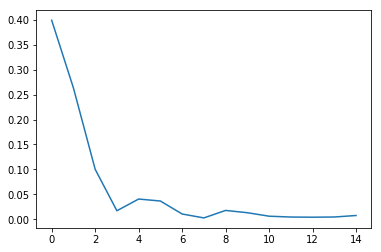

In [99]:
epoch_loss = model.history.history['loss']
plt.plot(range(len(epoch_loss)),epoch_loss)

In [100]:
pred_batch = scaled_train[-n_input:]
pred_batch = pred_batch.reshape((1, n_input, 1))
first_pred = model.predict(pred_batch)
first_pred, scaled_test[1]

(array([[0.9355568]], dtype=float32), array([0.99575339]))

In [101]:
test_pred = []

pred_batch = scaled_train[-n_input:]
current_batch = pred_batch.reshape((1, n_input, 1))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_pred.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [102]:
result_lstm = test.copy()
pred_lstm = np.array(scaler.inverse_transform(test_pred)).reshape(len(test_pred))
result_lstm["Predictions"] = pred_lstm

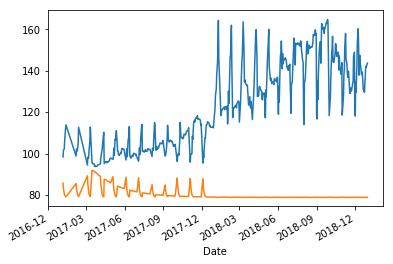

In [103]:
result_lstm["Close"].plot()
result_lstm["Predictions"].plot()

In [ ]:
# ARIMA (2,1,2) of Close__log
print("MSE:", mse(result2_tbl['Close'], result2_tbl['Prediction']))

print("RMSE:", rmse(result2_tbl['Close'], result2_tbl['Prediction']))

print("Adj RMSE:", rmse(result2_tbl['Close'], result2_tbl['Prediction'])/ np.mean(result2_tbl['Close']))

In [119]:
# Evaluating Predictions by LSTM model
print("MSE:", mse(result_lstm["Close"], result_lstm["Predictions"]))
print("RMSE:", rmse(result_lstm["Close"], result_lstm["Predictions"]))
print("Adj RMSE:", rmse(result_lstm['Close'], result_lstm['Predictions'])/ np.mean(result_lstm['Close']))

MSE: 2375.2900984044436
RMSE: 48.736947979991974
Adj RMSE: 0.3942260131333228


## Submission with LSTM

In [104]:
scaler2 = MinMaxScaler()

In [105]:
scaler2.fit(df[["Close"]])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [106]:
training_f = scaler2.transform(df[["Close"]])

In [107]:
generator2 = TimeseriesGenerator(training_f,training_f, length = n_input, batch_size = 32)

In [120]:
model_f = Sequential()
model_f.add(LSTM(100, activation='relu', input_shape=(n_input,1), return_sequences=True))
model_f.add(Dropout(0.2))
model_f.add(LSTM(50))
model_f.add(Dropout(0.2))
model_f.add(Dense(64))
model_f.add(Dense(32))
model_f.add(Dense(1))
model_f.compile(optimizer='adam', loss='mse')

model_f.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 50, 100)           40800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 100)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                3264      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [121]:
model_f.fit_generator(generator2,steps_per_epoch=2, epochs= 15)

Epoch 1/15
2/2 [==============================] - 7s 3s/step - loss: 0.1320
Epoch 2/15
2/2 [==============================] - 1s 334ms/step - loss: 1.5935e-04
Epoch 3/15
2/2 [==============================] - 1s 350ms/step - loss: 9.0416e-04
Epoch 4/15
2/2 [==============================] - 1s 537ms/step - loss: 0.0199
Epoch 5/15
2/2 [==============================] - 1s 328ms/step - loss: 0.0086
Epoch 6/15
2/2 [==============================] - 1s 654ms/step - loss: 0.0094
Epoch 7/15
2/2 [==============================] - 1s 685ms/step - loss: 0.0129
Epoch 8/15
2/2 [==============================] - 1s 476ms/step - loss: 0.0032
Epoch 9/15
2/2 [==============================] - 1s 378ms/step - loss: 0.0053
Epoch 10/15
2/2 [==============================] - 1s 327ms/step - loss: 0.0016
Epoch 11/15
2/2 [==============================] - 1s 351ms/step - loss: 0.0076
Epoch 12/15
2/2 [==============================] - 1s 353ms/step - loss: 5.7551e-04
Epoch 13/15
2/2 [=======================

In [122]:
test_pred = []

pred_batch = training_f[-n_input:]
current_batch = pred_batch.reshape((1, n_input, 1))

for i in range(355):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model_f.predict(current_batch)[0]
    
    # store prediction
    test_pred.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [123]:
test_pred_ori = scaler2.inverse_transform(test_pred)

In [124]:
# Exporting LSTM predictions to CSV for submission
subm_df = pd.read_csv('Sample Submission.csv')
subm_df['Close'] = np.array(test_pred_ori)
subm_df.to_csv('Subm_lstm v3.csv', index=False)